In [1]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [2]:
target1 = pd.read_csv('J075230.44+272619.8.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

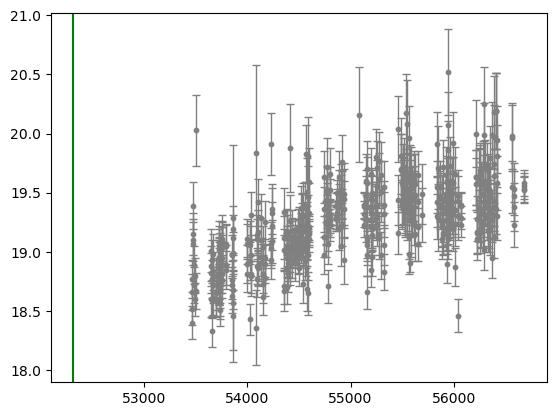

In [4]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 52317, color ='g')	
#plt.axvline(x= , color ='g')	

In [5]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

527

In [6]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.0072899999941000715,
 0.007330000000365544,
 0.007330000000365544,
 10.038430000000517,
 0.008130000001983717,
 0.008159999997587875,
 0.008310000004712492,
 9.909999999996217,
 0.006529999998747371,
 0.006509999999252614,
 0.006500000003143214,
 16.01658000000316,
 0.0053799999950570054,
 139.29330000000482,
 0.006519999995362014,
 0.006509999999252614,
 0.006520000002637971,
 9.945139999996172,
 0.004899999999906868,
 0.004890000003797468,
 0.004860000000917353,
 14.021939999998722,
 0.006990000001678709,
 0.006979999998293351,
 0.0070100000011734664,
 32.93587999999727,
 0.005380000002332963,
 0.005460000000311993,
 0.0054000000018277206,
 22.794859999994515,
 0.00803000000450993,
 0.008020000001124572,
 0.008029999997233972,
 5.112580000000889,
 0.005680000002030283,
 0.013989999999466818,
 0.005669999998644926,
 0.9665000000022701,
 0.00878999999986263,
 0.008589999997639097,
 0.00879999999597203,
 1.915580000000773,
 0.00789000000077067,
 0.007760000000416767,
 0.0078199999989

In [7]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

10


[13, 72, 114, 200, 248, 302, 374, 447, 515, 522]

In [8]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[14, 59, 42, 86, 48, 54, 72, 73, 68, 7, 5]

In [9]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [10]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
0,J075230.44+272619.8,1126039056834,18.40,0.14,118.12681,27.43902,53470.13827,0
1,J075230.44+272619.8,1126039056834,18.66,0.15,118.12679,27.43887,53470.14556,0
2,J075230.44+272619.8,1126039056834,18.77,0.16,118.12676,27.43892,53470.15289,0
3,J075230.44+272619.8,1126039056834,18.52,0.14,118.12678,27.43896,53470.16022,0
4,J075230.44+272619.8,1126039056834,19.15,0.18,118.12695,27.43884,53480.19865,0
...,...,...,...,...,...,...,...,...
448,J075230.44+272619.8,1126039056834,19.47,0.21,118.12667,27.43907,56579.50559,0
523,J075230.44+272619.8,2127098011769,19.53,0.11,118.12685,27.43884,56680.33193,0
524,J075230.44+272619.8,2127098011769,19.58,0.11,118.12686,27.43888,56680.33827,0
525,J075230.44+272619.8,2127098011769,19.52,0.11,118.12688,27.43884,56680.34731,0


In [11]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53506.17475

In [12]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

53866.14907

In [13]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54236.15843

In [14]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54600.15058

In [15]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

54939.1456

In [16]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55321.1917

In [17]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55693.17178

In [18]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56065.17669

In [19]:
df_9 = data.iloc[seppt[7]+1:seppt[8],:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56420.15448

In [20]:
df_10 = data.iloc[seppt[8]+1:seppt[9],:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

56579.50559

In [22]:
df_11 = data.iloc[seppt[9]+1:,:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

56680.35369

In [ ]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]

In [23]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g1.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g2.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g3.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g4.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g5.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g6.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g7.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g8.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g9.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [24]:
g10= pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g10.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g11= pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g11.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)




In [ ]:
g12= pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 10**(23-(g12.Mag +48.6)/2.5)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

In [25]:
med

[18.8, 18.83, 18.97, 19.08, 19.38, 19.37, 19.45, 19.39, 19.47, 19.54, 19.545]

In [26]:
centerMJD

[53482.16784923077,
 53743.76568637931,
 54115.52016292683,
 54482.9697317647,
 54834.02711595745,
 55213.36357226414,
 55564.91375211268,
 55942.54906736111,
 56316.39547567164,
 56568.98817833333,
 56680.3428]

In [27]:
medMJD


[53480.21494,
 53733.311495,
 54108.35231,
 54495.19855,
 54805.33081,
 55208.30637,
 55572.34663,
 55945.262535,
 56323.28948,
 56568.987365,
 56680.342789999995]

In [28]:
medopflux


[0.00010964781961431828,
 0.00010666413614217478,
 9.375620069258831e-05,
 8.472274141405911e-05,
 6.426877173170194e-05,
 6.486344335482401e-05,
 6.0255958607435935e-05,
 6.367955209079083e-05,
 5.915616341754767e-05,
 5.546492376763671e-05,
 5.521301271687668e-05]

In [30]:
st = 53470
#start of observations

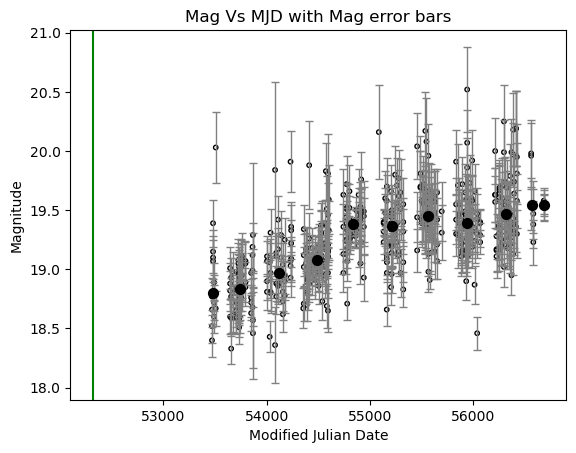

In [31]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x=52317  , color ='g')	
#plt.axvline(x=  , color ='g')	

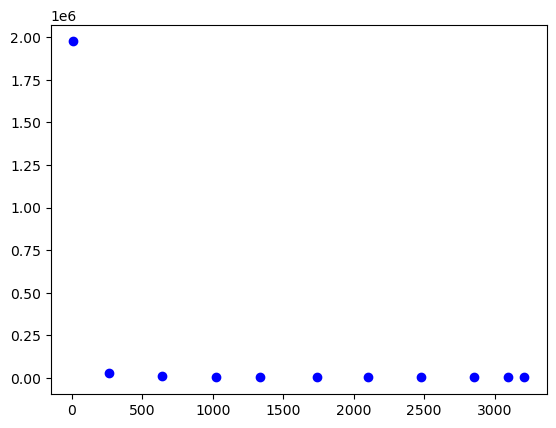

In [32]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [33]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [34]:
popt3

array([6.33424932e-03, 6.05969599e-01, 1.87239174e+01])

In [35]:
pcov3

array([[ 8.83526553e-05, -1.63792119e-03, -8.30786622e-04],
       [-1.63792119e-03,  3.05020184e-02,  1.48472065e-02],
       [-8.30786622e-04,  1.48472065e-02,  1.07120487e-02]])

In [36]:
 np.sqrt(np.diag(pcov3))

array([0.00939961, 0.17464827, 0.10349903])

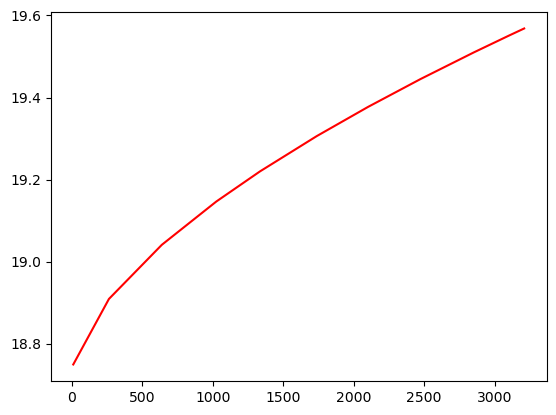

In [37]:
plt.plot(x, f(x,*popt3), 'r-')

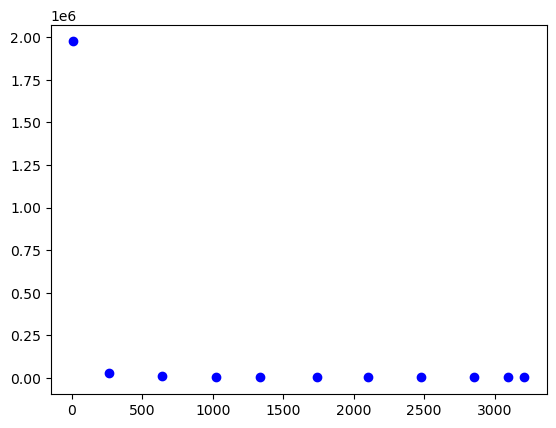

In [38]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [39]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag )

In [40]:
popt4

array([6.11901158e-03, 6.17878189e-01, 1.87055050e+01])

In [41]:
pcov4

array([[ 2.97866074e-05, -5.64375807e-04, -3.63425959e-04],
       [-5.64375807e-04,  1.07292631e-02,  6.73642022e-03],
       [-3.63425959e-04,  6.73642022e-03,  5.18881403e-03]])

In [42]:
 np.sqrt(np.diag(pcov4))

array([0.00545771, 0.10358216, 0.07203342])

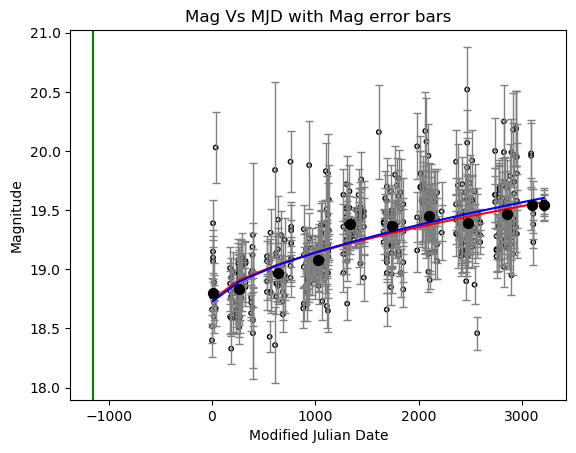

In [43]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 52317 -st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



Text(0.5, 1.0, 'Flux Density Vs MJD with Flux error bars')

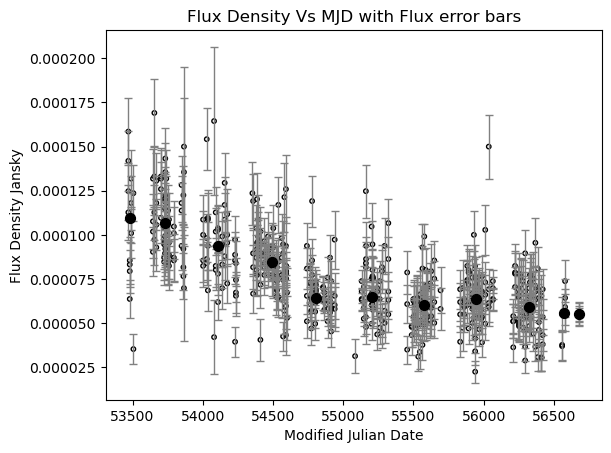

In [44]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

#plt.axvline(x=  , color ='g')	
#plt.axvline(x= , color ='g')

In [71]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [72]:
popt2

array([-9.61690367e-07,  5.19933260e-01,  1.16612986e-04])

In [73]:
pcov2

array([[ 1.79048693e-12,  2.15089242e-07, -1.03469727e-11],
       [ 2.15089242e-07,  2.59764644e-02, -1.19907939e-06],
       [-1.03469727e-11, -1.19907939e-06,  7.74103653e-11]])

In [74]:
 np.sqrt(np.diag(pcov2))

array([1.33809078e-06, 1.61172158e-01, 8.79831605e-06])

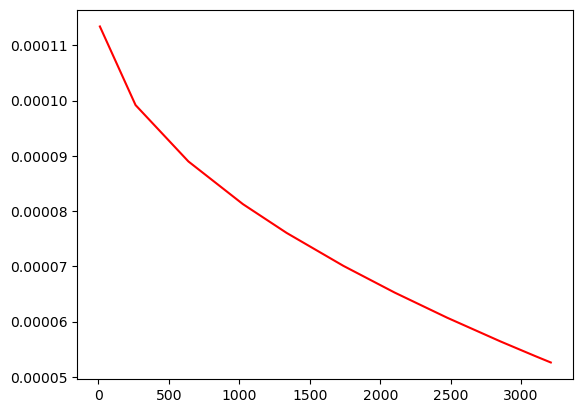

In [75]:
plt.plot(x, f(x,*popt2), 'r-')

In [76]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [77]:
popt1

array([-1.32222520e-06,  4.93030575e-01,  1.22845306e-04])

In [78]:
pcov1

array([[ 8.64935421e-13,  7.35305264e-08, -5.18253078e-12],
       [ 7.35305264e-08,  6.28009359e-03, -4.30300982e-07],
       [-5.18253078e-12, -4.30300982e-07,  3.52908009e-11]])

In [79]:
 np.sqrt(np.diag(pcov1))

array([9.30019043e-07, 7.92470415e-02, 5.94060610e-06])

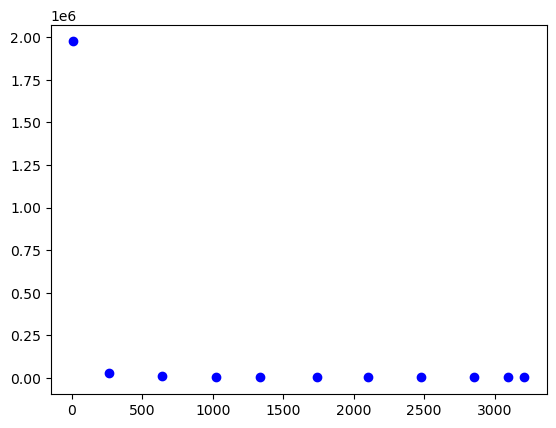

In [80]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


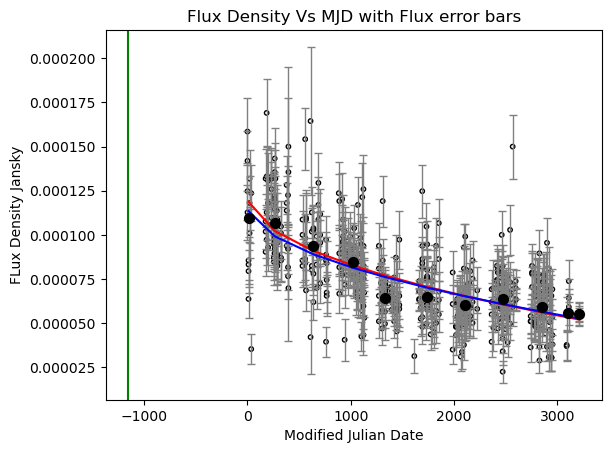

In [81]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
#plt.ylim(0, 0.0004)

plt.axvline(x= 52317-st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,*popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [82]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [57]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



NameError: name 'func' is not defined

In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
